In [47]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [48]:
cls1_data = np.array([[2.93,6.634],[2.53,7.79],[3.57,5.65],[3.16,5.47]]) # class1인 데이터 포인트
cls2_data = np.array([[2.58,4.44],[2.16,6.22],[3.27,3.52]]) # class2 인 데이터 포인트

E_cls1 = np.mean(cls1_data, axis = 0)
E_cls2 = np.mean(cls2_data, axis = 0)
E_all = (np.sum(cls1_data, axis = 0) + np.sum(cls2_data, axis = 0)) / (np.size(cls1_data,0) + np.size(cls2_data,0))

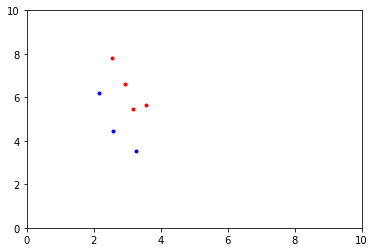

In [49]:
plt.figure('data_point_variance')
plt.axis([0,10,0,10])
plt.plot(cls1_data[:,0],cls1_data[:,1],'.',color = 'r')
plt.plot(cls2_data[:,0],cls2_data[:,1],'.', color = 'b')
plt.show()

In [50]:
# between-class scatter matrix
x1 = np.array([E_cls1 - E_all])
x2 = np.array([E_cls2 - E_all])
all_size = np.size(cls1_data,0) + np.size(cls2_data,0)
Sb = (np.size(cls1_data,0) / all_size) * (np.transpose(x1) * x1) + np.size(cls2_data,0) / all_size * (np.transpose(x2) * x2)
print(Sb)

[[0.03489949 0.15340367]
 [0.15340367 0.67429888]]


In [51]:
# within-class scatter matrix
y1 = np.zeros([np.size(Sb,0),np.size(Sb,1)])
for i in range(np.size(cls1_data,0)):
    y1 = y1 + (np.transpose(np.array([(cls1_data[i,:] - E_cls1)])) * (cls1_data[i,:] - E_cls1))

y2 = 0
for i in range(np.size(cls2_data,0)):
    y2 = y2 + (np.transpose(np.array([(cls2_data[i,:] - E_cls2)])) * (cls2_data[i,:] - E_cls2))

Sw = (np.size(cls1_data,0) / all_size) * y1 + (np.size(cls2_data,0) / all_size) * y2
print(Sw)

[[ 0.59338571 -1.33609714]
 [-1.33609714  3.56552686]]


In [52]:
# 데이터 포인트들을 투영시킬 벡터 찾기
# Sb = np.array([Sb])
# Sw = np.array([Sw])
eig_val, eig_vec = linalg.eig(linalg.inv(Sw) * Sb)
# eig_val,eig_vec = np.linalg.eig(np.transpose(Sw) * Sb) // linalg.inv(np.transpose(Sw) * Sb)
largest_eig_val, val_index = np.max(eig_val),np.argmax(eig_val)
vector = eig_vec[:,val_index] # 가장 큰 고유값에 대응하는 고유 벡터
print(eig_val)
print(eig_vec)

[0.04620784+0.j 1.54057586+0.j]
[[-0.88262702 -0.47007398]
 [ 0.47007398 -0.88262702]]


In [53]:
# 그 벡터로 데이터 포인트 투영
new_cls1_data = cls1_data * vector
new_cls2_data = cls2_data * vector

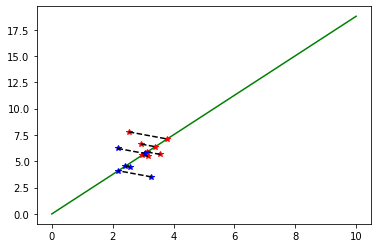

In [54]:
# 그래프에 그 벡터 그리기
plt.figure('graph - draw vector')
# plt.axis([0, 10, 0, 10])
a = vector[1] / vector[0] # 변화량
plt.plot([0,10],[0,10 * a],'-g') # 벡터 그리기 (원점에서부터 x = 10에 해당하는 y값 까지)

for i in range(np.size(cls1_data,0)):
    plt.plot(cls1_data[i,0],cls1_data[i,1], '*r')
for j in range(np.size(cls2_data,0)):
    plt.plot(cls2_data[j,0],cls2_data[j,1] ,'*b')
    
#데이터 포인트들이 투영된 모습 그리기
for i in range(np.size(cls1_data,0)):
    new_x = (cls1_data[i,0] + a * cls1_data[i,1]) / (a**2 + 1)
    new_y = a * new_x
    plt.plot(new_x, new_y,'*r') # class 1 데이터포인트들이 그 벡터에 투영된 모습
    plt.plot([cls1_data[i,0],new_x],[cls1_data[i,1],new_y],'--k')
    
for i in range(np.size(cls2_data,0)):
    new_x = (cls2_data[i,0] + a * cls2_data[i,1]) / (a**2 + 1)
    new_y = a * new_x
    plt.plot(new_x,new_y,'*b')
    plt.plot([cls2_data[i,0],new_x], [cls2_data[i,1],new_y],'--k')

plt.show()

0.5828917345805573
0.05295762111035396
class -> blue


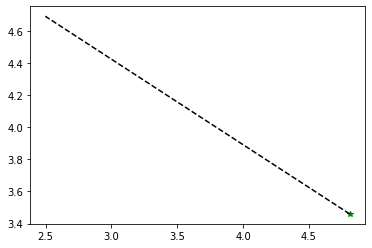

In [55]:
# 새로운 데이터 포인트의 클래스 예측하기
test_data = np.array([4.81,3.46])
plt.plot(test_data[0],test_data[1],'*g') # 테스트 데이터 포인트 그리기
result = test_data * vector # 위의 벡터로 테스트 데이터 포인트 투영

projected_test_data_x = (test_data[0] + a * test_data[1]) / (a**2 + 1)
projected_test_data_y = a * projected_test_data_x 
plt.plot([test_data[0],projected_test_data_x],[test_data[1],projected_test_data_y],'--k')

temp1 = new_cls1_data - result # 클래스1에 속하는 데이터의 투영들과 테스트 데이터의 투영의 차이
temp2 = new_cls2_data - result # 클래스2에 속하는 데이터의 투영들과 테스트 데이터의 투영의 차이
print(np.min(np.abs(temp1)))
print(np.min(np.abs(temp2)))
if np.min(np.abs(temp1)) < np.min(np.abs(temp2)):
    print('class -> {}'.format('red'))
else:
    print('class -> {}'.format('blue'))